<a href="https://colab.research.google.com/github/ahmedmoustafa/popgen/blob/main/Hardy_Weinberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hardy-Weinberg
---

This exercise will explore the relationship between genotype frequencies and allele frequencies to see if simulated genotype frequencies will follow the expected frequencies as expected by [Hardy-Weinberg Equilibrium](https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle) (HWE).

Let's assume that we have a diploid population of size `n`, and the locus of interest has two alleles, `A` and `a`. We will randomly sample from that population's gametes to produce the genotypes (`AA`, `Aa`, or `aa`) mimicking random mating.

The simulation will be performed for different alleles (`A`, `a`) frequencies, (`p` and `q`, respectively).

In [1]:
n = 1000 # Population size
n

[1] 1000

Generate different values for `p`, freq(`A`), starting from 1 going down to zero

In [2]:
list_of_freqs = seq(1, 0, by = -0.01) 
length(list_of_freqs)
head(list_of_freqs)
tail(list_of_freqs)

[1] 101

[1] 1.00 0.99 0.98 0.97 0.96 0.95

[1] 0.05 0.04 0.03 0.02 0.01 0.00

In [3]:
AA_freq = NULL
Aa_freq = NULL
aa_freq = NULL

In [4]:
for (i in 1:length(list_of_freqs)) {
  p = list_of_freqs[i]
  q = 1 - p
  A = rep("A", 2 * n * p)
  a = rep("a", 2 * n * q)
  pop = c(A, a)

  AA_count = 0
  Aa_count = 0
  aa_count = 0

  for (j in 1:n) {
    z = sample(pop, 2, replace = FALSE)
    if (z[1] == "A" & z[2] == "A") {
      AA_count = AA_count + 1
    } else if (z[1] == "A" & z[2] == "a" | z[1] == "a" & z[2] == "A") {
      Aa_count = Aa_count + 1
    } else if (z[1] == "a" & z[2] == "a") {
      aa_count = aa_count + 1
    }
  }
  
  AA_freq[i] = AA_count / n
  Aa_freq[i] = Aa_count / n
  aa_freq[i] = aa_count / n
}

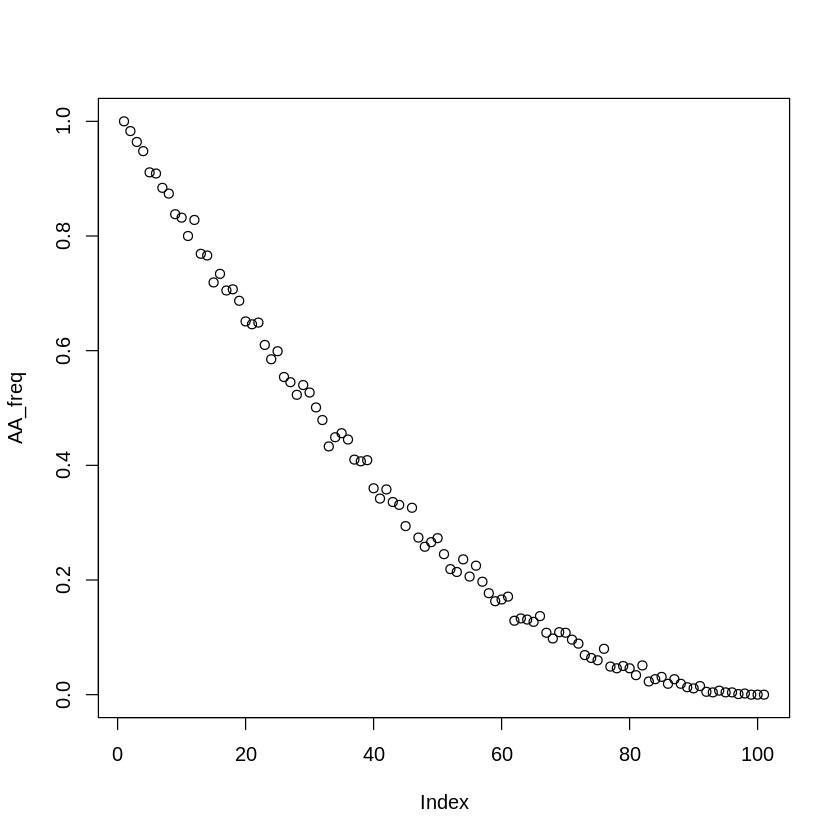

In [5]:
plot(AA_freq)

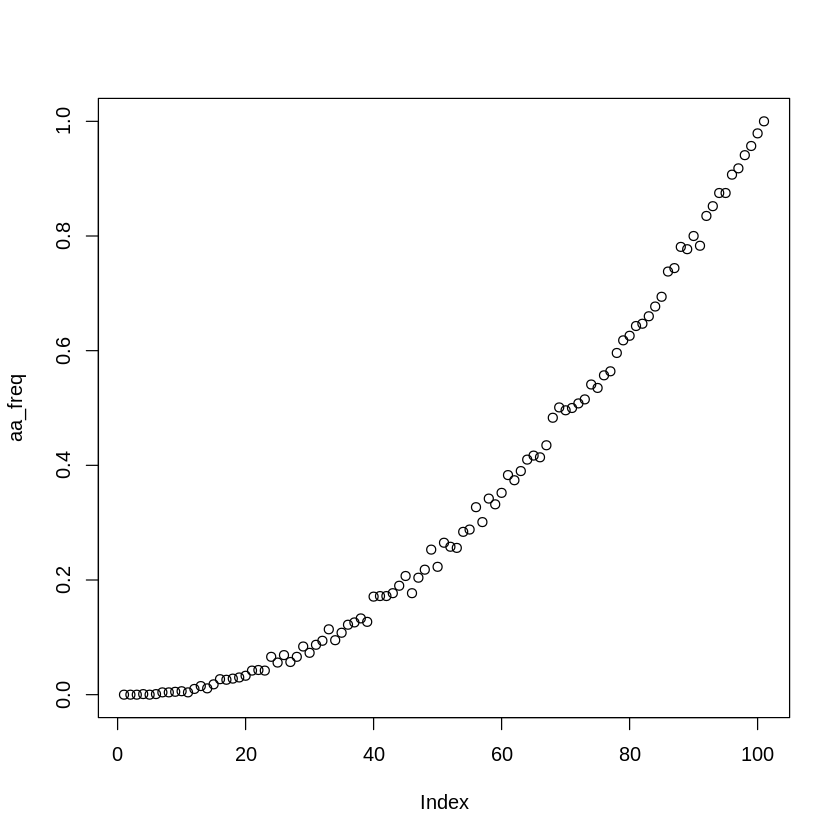

In [6]:
plot(aa_freq)

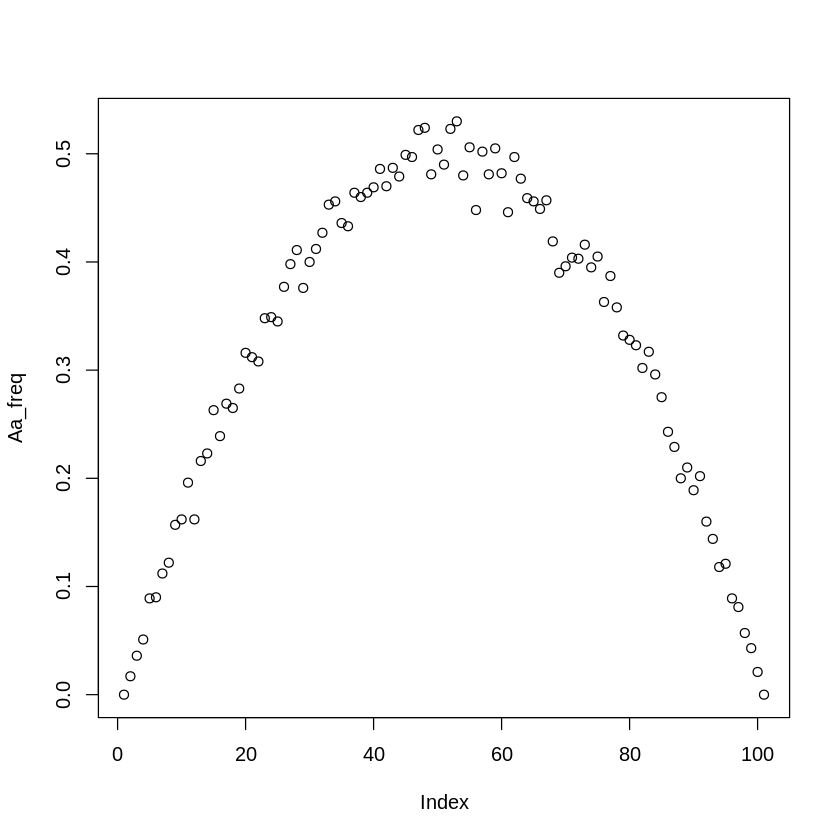

In [7]:
plot(Aa_freq)

Let's put it all together

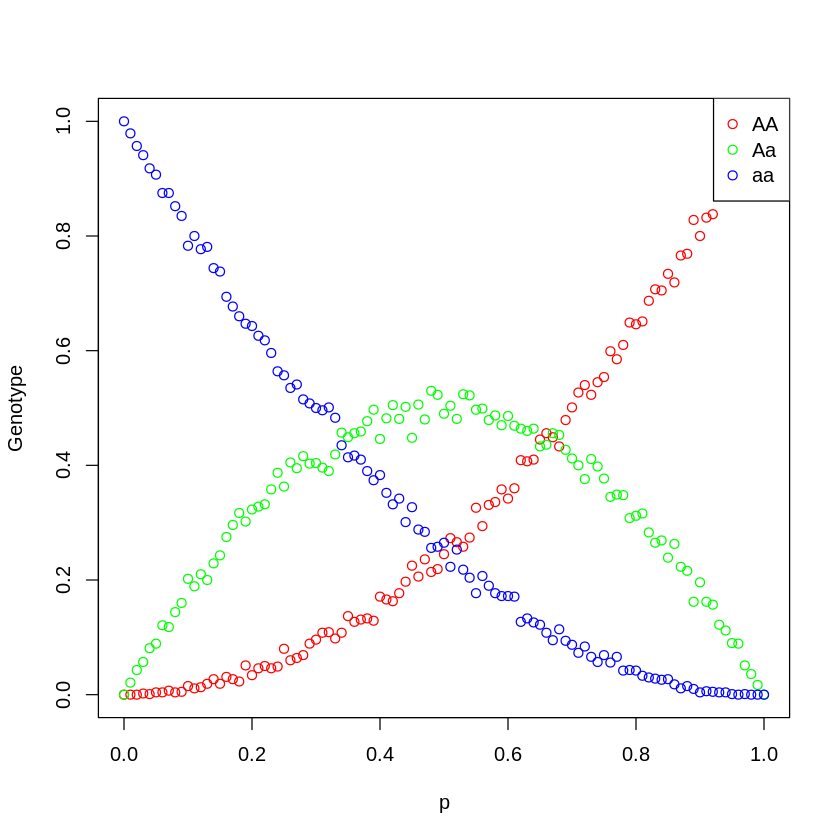

In [8]:
plot(AA_freq  ~ list_of_freqs, col = "red", xlab = "p", ylab = "Genotype")
points(Aa_freq  ~ list_of_freqs, col = "green")
points(aa_freq  ~ list_of_freqs, col = "blue")
legend("topright", legend = c("AA", "Aa", "aa"), col = c("red", "green", "blue"), pch = 1)